In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA

In [88]:
data = pd.read_csv('moments.csv', index_col=None)
data.dtypes

0       float64
1       float64
2       float64
3       float64
4       float64
dist     object
dtype: object

In [94]:
# predictors
X = data.drop('dist', axis=1)

# response variable
y = data['dist']

# all features are continuous

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=10)

# scaling the data
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

C:\Users\shfar\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\shfar\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


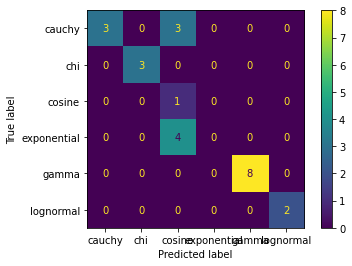

In [95]:
clf_svm = SVC(random_state=10)
clf_svm.fit(X_train_scaled, y_train)

plot_confusion_matrix(clf_svm, X_test_scaled, y_test)

In [96]:
param_grid = [
    {'C':[0.01, 0.1, 0.5, 1, 1.5, 5, 10, 25],
     'gamma':['scale', 1, 0.5, 0.1, 0.01, 0.001, 0.0001],
     'kernel':['rbf']},
]

optimal_params = GridSearchCV(SVC(), param_grid,cv=5, scoring='accuracy', verbose=0)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 25, 'gamma': 1, 'kernel': 'rbf'}


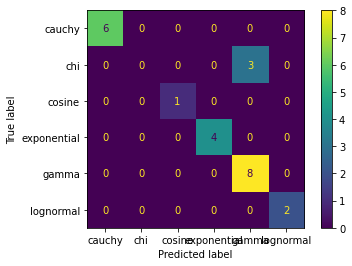

In [97]:
clf_svm = SVC(random_state=10, C=25, gamma=1)
clf_svm.fit(X_train_scaled, y_train)
plot_confusion_matrix(clf_svm, X_test_scaled, y_test)